In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [2]:
sns.set()


## Bernouli trials
Random Number generator

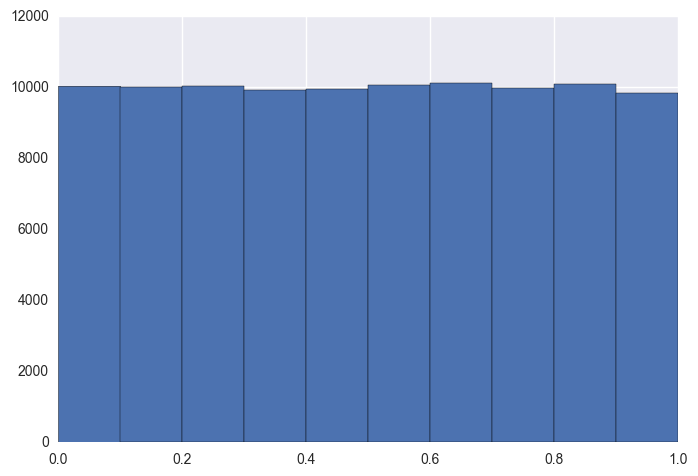

In [3]:
np.random.seed(42)
random_numbers = np.empty(100000)

# Generate random numbers 
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [4]:

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""

    n_success = 0

    for i in range(n):
        random_number = np.random.random()
        # If less than p, it's a success 
        if random_number < p:
            n_success += 1

    return n_success

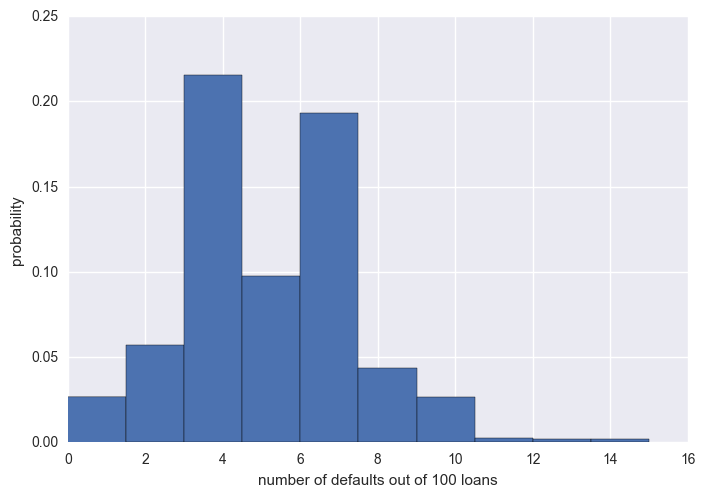

In [5]:

np.random.seed(42)

n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)
    x = np.sort(data)
    # The y data of the ECDF go from 1/n to 1 in equally spaced increments, that we construct using np.arange().
    # The end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. 
    # Be sure to divide this by n.
    y = np.arange(1, n+1) / n 

    return x, y

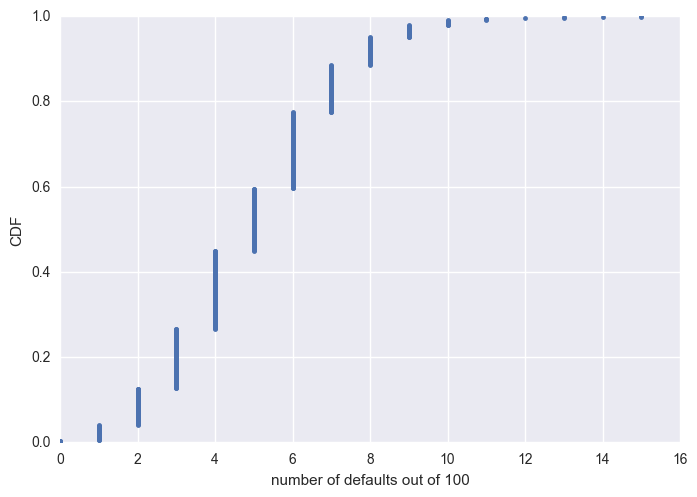

Probability of losing money = 0.022


In [7]:

x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

plt.show()

n_lose_money = np.sum(n_defaults >= 10)

# probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Sampling out of the Binomial distribution

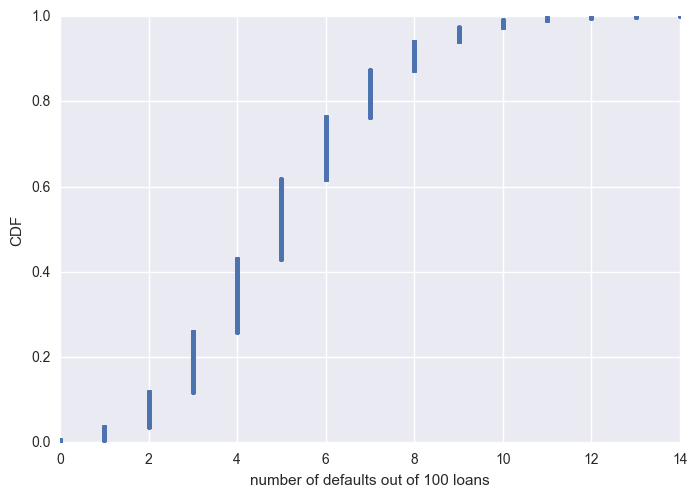

In [8]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

plt.show()

### Plotting the Binomial PMF

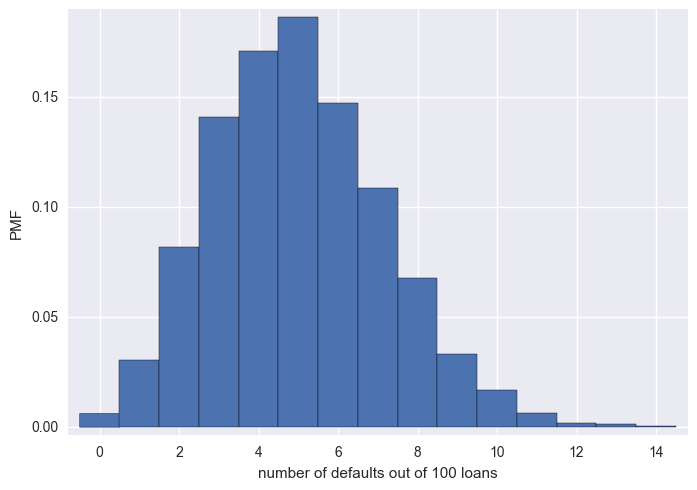

In [9]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, normed=True, bins=bins)

plt.margins(0.02)

_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

plt.show()

In [10]:
np.arange?


### Poisson processes and the Poisson distribution
#### Poisson process

#### Relationship between Binomial and Poisson distributions

In [11]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

Poisson:      10.0145 3.17135456075


1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?
